In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('C:/Users/amarn/Desktop/Data Science/Python/Asian Paints 5-Year Dataset.csv')

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-29,1125.000000,1150.000000,1125.000000,1146.550049,1111.703491,460152
1,2017-05-30,1150.000000,1166.099976,1147.000000,1159.449951,1124.211670,460978
2,2017-05-31,1159.000000,1165.000000,1144.550049,1151.199951,1116.212280,1488564
3,2017-06-01,1150.000000,1162.000000,1133.099976,1160.449951,1125.181152,578030
4,2017-06-02,1161.199951,1174.900024,1160.199951,1164.300049,1128.914063,437401


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


<AxesSubplot:>

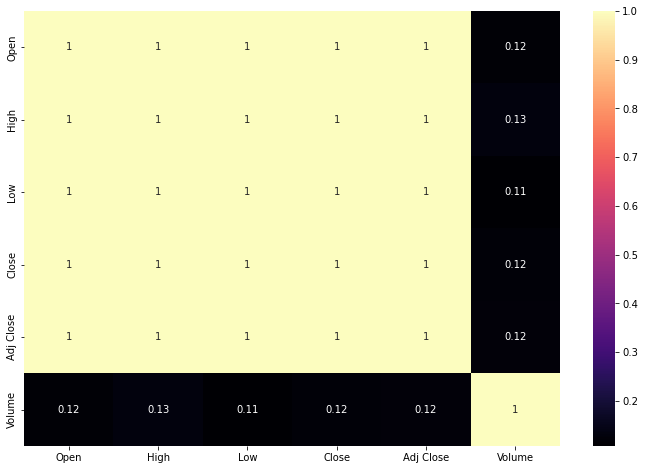

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='magma')

In [22]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2017-05-29,1125.000000,1150.000000,1125.000000,1146.550049,1111.703491,460152,5,2017
1,2017-05-30,1150.000000,1166.099976,1147.000000,1159.449951,1124.211670,460978,5,2017
2,2017-05-31,1159.000000,1165.000000,1144.550049,1151.199951,1116.212280,1488564,5,2017
3,2017-06-01,1150.000000,1162.000000,1133.099976,1160.449951,1125.181152,578030,6,2017
4,2017-06-02,1161.199951,1174.900024,1160.199951,1164.300049,1128.914063,437401,6,2017


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
 7   Month      1235 non-null   int64  
 8   Year       1235 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 87.0+ KB


In [25]:
y=df['Close']

In [26]:
X=df[['High','Low','Adj Close']]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
lm.coef_

array([-0.0163808 ,  0.04997202,  0.95433831])

In [33]:
lm.intercept_

43.16641474904395

In [34]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

In [35]:
cdf

,Coeff
High,-0.016381
Low,0.049972
Adj Close,0.954338


In [36]:
pred = lm.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
print(mean_absolute_error(pred, y_test))

3.1439292938440953


In [39]:
print(mean_squared_error(pred, y_test))

16.678300308860194


In [40]:
print(np.sqrt(mean_squared_error(pred, y_test)))

4.08390748044813
